# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


## Members
### Luis Alejandro Aguilar Díaz - A01795362
### Pablo Yamamoto Magaña - A01022382
### Gabriel Paredes Garza - A00797698

In [12]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = './asl_data'
# DATA_PATH = '/content/drive/MyDrive/my documents/COLAB/Advanced Machine Learning/1b/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [14]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [15]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

# **split_val_test**
**split_val_test** is a function that accepts 4 parameters:



*   x - A dataset
*   y - Etiquettes corresponding to dataset.
*   pct - Determines what is the % of split data between validation and testing. (By default 0.5 -50%)
*   shuffle - Determines if the dataset (x) and etiquettes (y) are going to be randomly shuffled before being splitted.


**Explanation**
* rng object is created to be used to shuffle randomly indexes of our data if shuffle variable happens to be true.

* idx array is created to store indexes corresponding to both x and y.

* A validation of shuffle is created to verify if shuffle is true or false, if true, we shuffle idx array, if not, we pass.

* id_pct is created with the purpose of storing the quantity of elements to be stored in val and test.

* idx1 and idx2 are both variables that store indexes to be used to select elements for validation and testing respectively.

* Finally, validation and testing data is returned for both x and y sets.


In [16]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    rng = np.random.default_rng()
    idx = np.arange(x.shape[0])
    if shuffle:
        rng.shuffle(idx)
    id_pct = int(x.shape[0] * pct)
    idx1 = np.sort(idx[:id_pct])
    idx2 = np.sort(idx[id_pct:])
    return x[idx1, ...], y[idx1, ...], x[idx2, ...], y[idx2, ...]

In [17]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [18]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

# **normalise**

**normalise** is a function that takes three attributes:

* mean - Mean value.

* std - Standard deviation value.

* Data - Data set to be normalised.

**Explanation**

Basically normalise funciton takes the result of data minus the mean and then divides it with the standard deviation.

In [19]:
def normalise(mean, std, data):
    return (data - mean) / std

We determine both mean and standard deviation for x train dataset.

Then we apply normalise function for train, validation and test datasets.

In [20]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

### Graficar muestras

# **plot_number**

plot_number is a function that takes only one attribute:

* image -  Is a three dimension array that is meant to represent an image to be processed and plotted.


**Explanation**

* We create a space of 5 x 5 where will be plotting our image.

* With the use of .imshow we display the image.

* We omit any label that would be displayed accompanying our image.

* Finally we render our image.

In [21]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

We detemine a random index to be used to select an image in our dataset.

We print what is the etiquette of our image.

Finally, with plot_number we plot the selected image.

La imágen es una : c


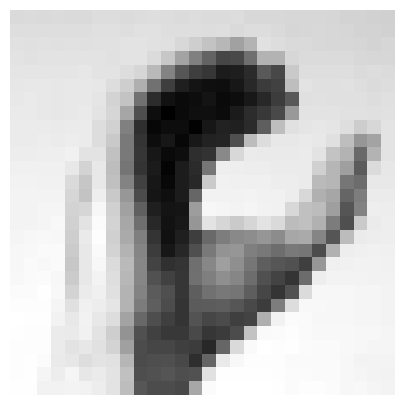

In [22]:
idx = np.random.randint(y_test.shape[0])
print(f'La imágen es una : {alphabet[y_test[idx]]}')
plot_number(x_test[idx].reshape(1, 28, 28))

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

# **create_mini_batches**

**create_mini_batches** is a function that takes 4 attributes:

* size - Determines the size for each mini batch.

* x - Takes our dataset.

* y - Takes all etiquettes corresponding to our dataset.

* shuffle - Is a variable that takes a boolean to determine if all indexes of x and y are going to be shuffled.

**Explanation**

* First of all we validate if x and y are the same shape, that means that for every record in x, must be a record corresponding it in y.

* After that, we store the length of x in a variable.

* If shuffle attibute happens to be True, we create an array (idxs) with all the indexes of x.

* Then, we shuffle all indexes in idxs.

* And then, we store in a variable x and y all reordened records of attributes x and y.

* Finally we return all minibatches generated.



In [23]:
def create_mini_batches(size, x, y, shuffle=True):
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+size], y[i:i+size]) for i in range(0, total_data, size))

We look into the shape of x_train

In [24]:
x_train.shape

(27455, 784)

## Nuestra clase Linear, ReLU y Sequential

###  Clase Linear

# **np_tensor**

np_tensor basically is created to only inherit from Numpy's np.ndarray.

In [25]:
class np_tensor(np.ndarray): pass

# **Linear**

Function **__ init__** , this function what it does is to initialize our class, it takes two attributes:

* input_size - That is the number of input features.
* output_size - That is the number of output features.

Here we Determine values for both W (Weights) and b (Bias) for our Layer.

Function **__ call__** is used to treat our class like a function, it allows to initially take one argument (X) and calculate the output of our layer.

Function **backward**, takes two arguments:
* X - Input.
* Z - Output from the forward pass.

Here we focus on gradient calculation for Weight and bias in our layer

In [26]:
class Linear():
    def __init__(self, input_size, output_size):
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X):
        return self.W @ X + self.b
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

# **ReLu**

Funciton **__ call__** takes Z (output from previous layer) as an attribute and returns a list with the maximum of 0 and its corresponding number in z.

Function **backward**, takes Z and A (Output from the forward pass and gradients for the next layer). Here we determine Z gradient to be the same as the gradient of A. And for all gradients that are equal or less than zero to be just zero.

In [27]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Clase Sequential

# **Sequential**

Class Sequential has a total of 4 functions:

Function **__ init__**, takes just one argument:
* layers - That refer to the total of layers to be used in our neuronal network.

Here we initialize local variables, layers, x and outputs with its default values.

Function **__ call__** like we viewied in latest functions, __ call__ function is mostly used to treat our class like a function firstly, it takes just one argument:

X - The input data for the network.

Here we initialize a local variable x and set the output for layer 0 to be equal as x.

Then we iterate trough all layers taking all the corresponding outputs and storing it in the outputs array, and after that we return the final output.

Function **backward** here we generate all the gradients needed for backpropagation for our network..

Function **update** takes only one argument an it is learning_rate that is going to be used for update weights and biases trough all layers.

Function **predict** takes only one argument, X. That is the input to be used to bake the prediciton, here we call the forward function and then we take the index of the maximum value in the output.


In [28]:
class Sequential():
    def __init__(self, layers):
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

This function allows us to turn the linear results of the model an turn them into probabilities, they all sum 1 and each result tells you the probability that they belong to each class. It also calculates the loss between the predicted probabilities and the real labels and calculates the gradient that is required in retro propagation. 

We get the number of samples from the minibatch with x.shape[1], then we apply the exponential to every element in x which is required to calc the softmax. 

After that we will get the cost by first, obtaining the probabilities of the correct classes for every sample with y_hat = probs[y.squeeze(), np.arange(batch_size)], then we get the individual loss, add them up and divide them by the number of samples. 

Finally we substract 1 from the predicted probabilities of the true classes, so probs have y_hat(i) - y(i). y_hat is the predicted probability and y is the label, it has 1 for true class and 0 for the rest of them. 

In [29]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

During this function, we will train our model for a selected number of times or epochs. For every epoch, we will create the x number of mini batches, we send the mini batch in the forward pass to our neural network, calculate the cost, do the backward propagation and update the Weights and Biases for every layer with. 

In this way, we are memory efficient, by sending random subsets of our data to our Network and training it multiple times, this allows us our model to generalize well and prevent overfitting. 

In [30]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_mini_batches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

After every epoch we will see how accurate are model is with the validation data. 

accuracy = correct_number_of_predicted_samples / total_number_of_evaluated_samples

Once again we will do this with mini bathces, and for every batch we will do forward pass with the data, then we will compare the predictions of the classes with the true labels, this comparison will output an array of booleans, where we will add all True values to obtain the correct number of predictions. Then we just need to divide it by the total number of samples and return it. 

In [31]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_mini_batches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

### Create your model and train it

Given the Sequential function previously created, we determine that our neuronal network will have 4 Linear layers and 3 Activation Layers.

We determinated that the best size for our mini batches is 128.

And the best learning rate is 1e-3.

And Finally the total of epochs to be used for best training is 20.

In [58]:
model = Sequential([Linear(784, 500), ReLU(), Linear(500, 350), ReLU(), Linear(350, 200), ReLU(), Linear(200, 24)])
mb_size = 128
learning_rate = 1e-3
epochs = 20


We call train function and we start to train!, finally obtaining an accuracy of 79.39%

In [59]:
train(model, epochs, mb_size, learning_rate)

costo: 0.01707352795177713, accuracy: 0.798382598996096
costo: 0.00807742027075458, accuracy: 0.8039598438371445
costo: 0.004966172385259166, accuracy: 0.7961517010596765
costo: 0.0025509881792346125, accuracy: 0.7950362520914668
costo: 0.0021679813166237964, accuracy: 0.7967094255437813
costo: 0.0015776361443619689, accuracy: 0.7955939765755716
costo: 0.0014711635607748696, accuracy: 0.7936419408812047
costo: 0.0008657783708017775, accuracy: 0.7961517010596765
costo: 0.0010519780588905078, accuracy: 0.7941996653653095
costo: 0.0006306651865044747, accuracy: 0.7950362520914668
costo: 0.0005885353530348676, accuracy: 0.7961517010596765


### Test your model on Random data from your test set

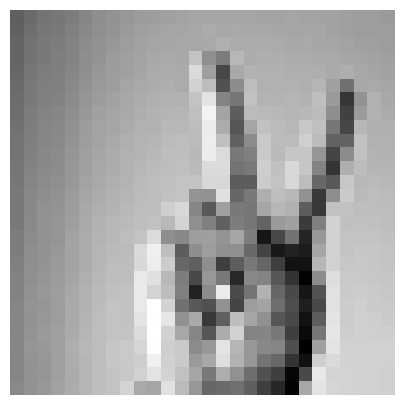

el valor predicho es: w el valor real es:v


In [51]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')